In [1]:
# https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00333-6

In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

from keras.models import Sequential
from keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('TSLA.csv')

In [8]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [10]:
df.shape

(2416, 7)

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [17]:
# If any date present in the dataset is null then it will display true
df['Date'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2411    False
2412    False
2413    False
2414    False
2415    False
Name: Date, Length: 2416, dtype: bool

In [46]:
df.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2411,False,False,False,False,False,False
2412,False,False,False,False,False,False
2413,False,False,False,False,False,False
2414,False,False,False,False,False,False


In [47]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Exploratory Data Analysis

Text(0, 0.5, 'Price in Dollars: ')

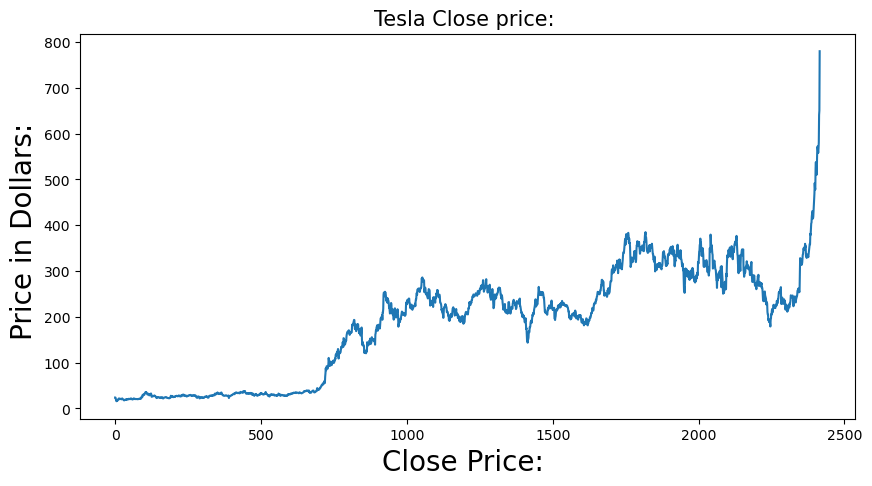

In [30]:
plt.figure(figsize = (10,5))
plt.plot(df['Close'])

plt.title('Tesla Close price: ', fontsize = 15)
plt.xlabel('Close Price: ', fontsize = 20)
plt.ylabel('Price in Dollars: ', fontsize = 20)


In [20]:
# So from this graph, we get that the stock Price data analysis
# Moving over upwards by time to by time and how the end of the quarters
# affects the prices of the stock. It showing an uppwards trends depicted by 
# the plot of closing stock prices.

In [21]:
df.shape

(2416, 7)

In [32]:
df['Close']

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [33]:
df['Adj Close']

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Adj Close, Length: 2416, dtype: float64

In [37]:
print(df['Close'] == df['Adj Close'])
df[df['Close'] == df['Adj Close']].shape

0       True
1       True
2       True
3       True
4       True
        ... 
2411    True
2412    True
2413    True
2414    True
2415    True
Length: 2416, dtype: bool


(2416, 7)

In [38]:
# As both of teh columns data is coming same so we can drop any one column for better analysis

In [ ]:
df = df.drop(['Adj Close'], axis = 1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


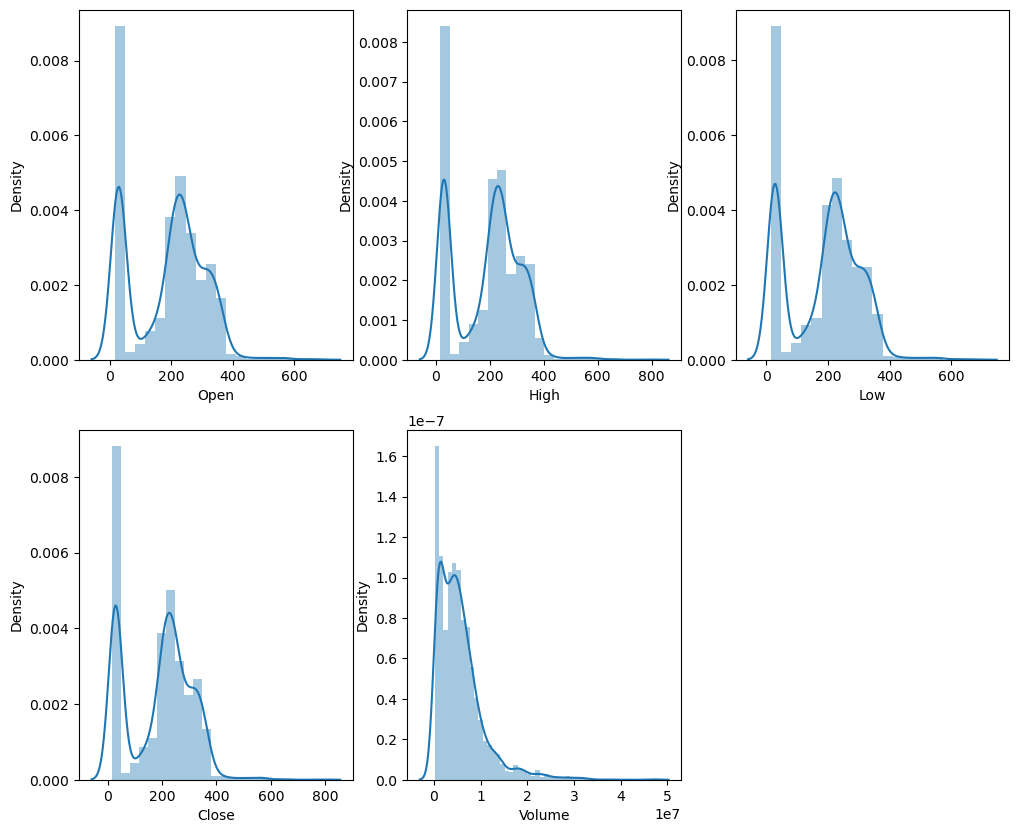

In [59]:
 # Distribution plots using Bar plots

features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize = (12, 10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])

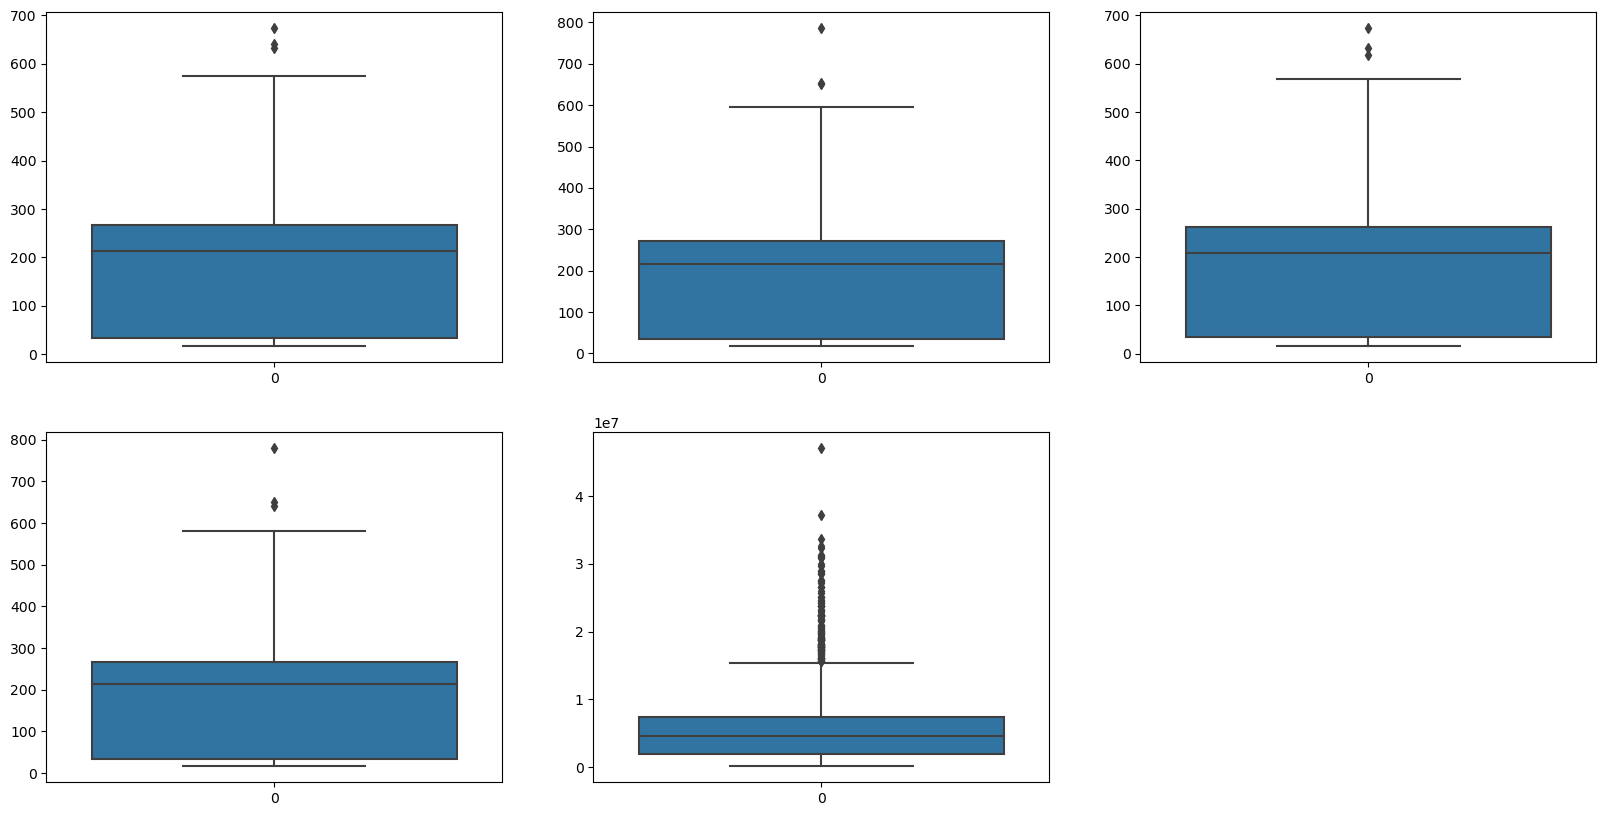

In [61]:
# Using Boxplots
plt.subplots(figsize = (20, 10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
plt.show()

In [66]:
# Moving Average using Rolling function

In [69]:
df100 = df.Close.rolling(100).mean()
df100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2411    343.527601
2412    347.041701
2413    351.175301
2414    355.363101
2415    360.807701
Name: Close, Length: 2416, dtype: float64

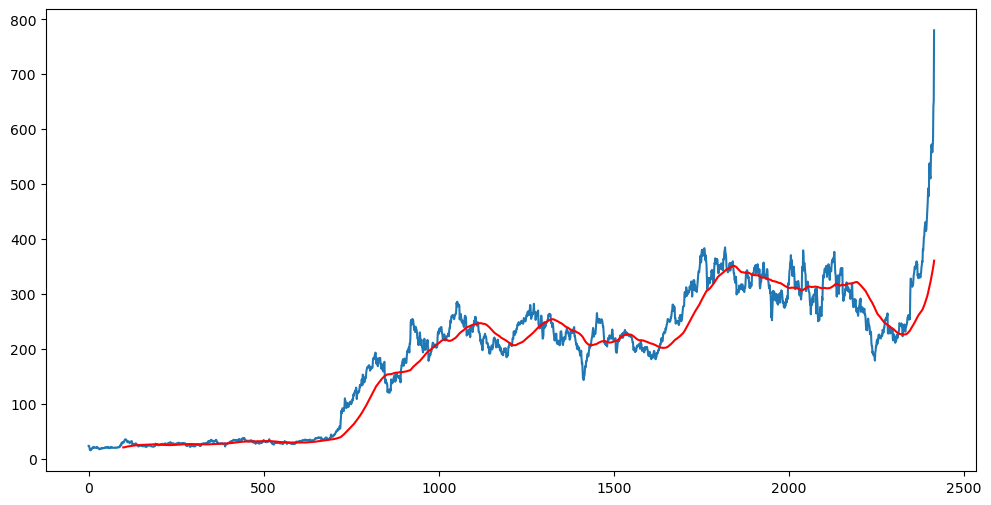

In [74]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(df100, 'r')

In [75]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2411    286.456801
2412    288.023250
2413    289.895400
2414    291.781451
2415    294.325300
Name: Close, Length: 2416, dtype: float64

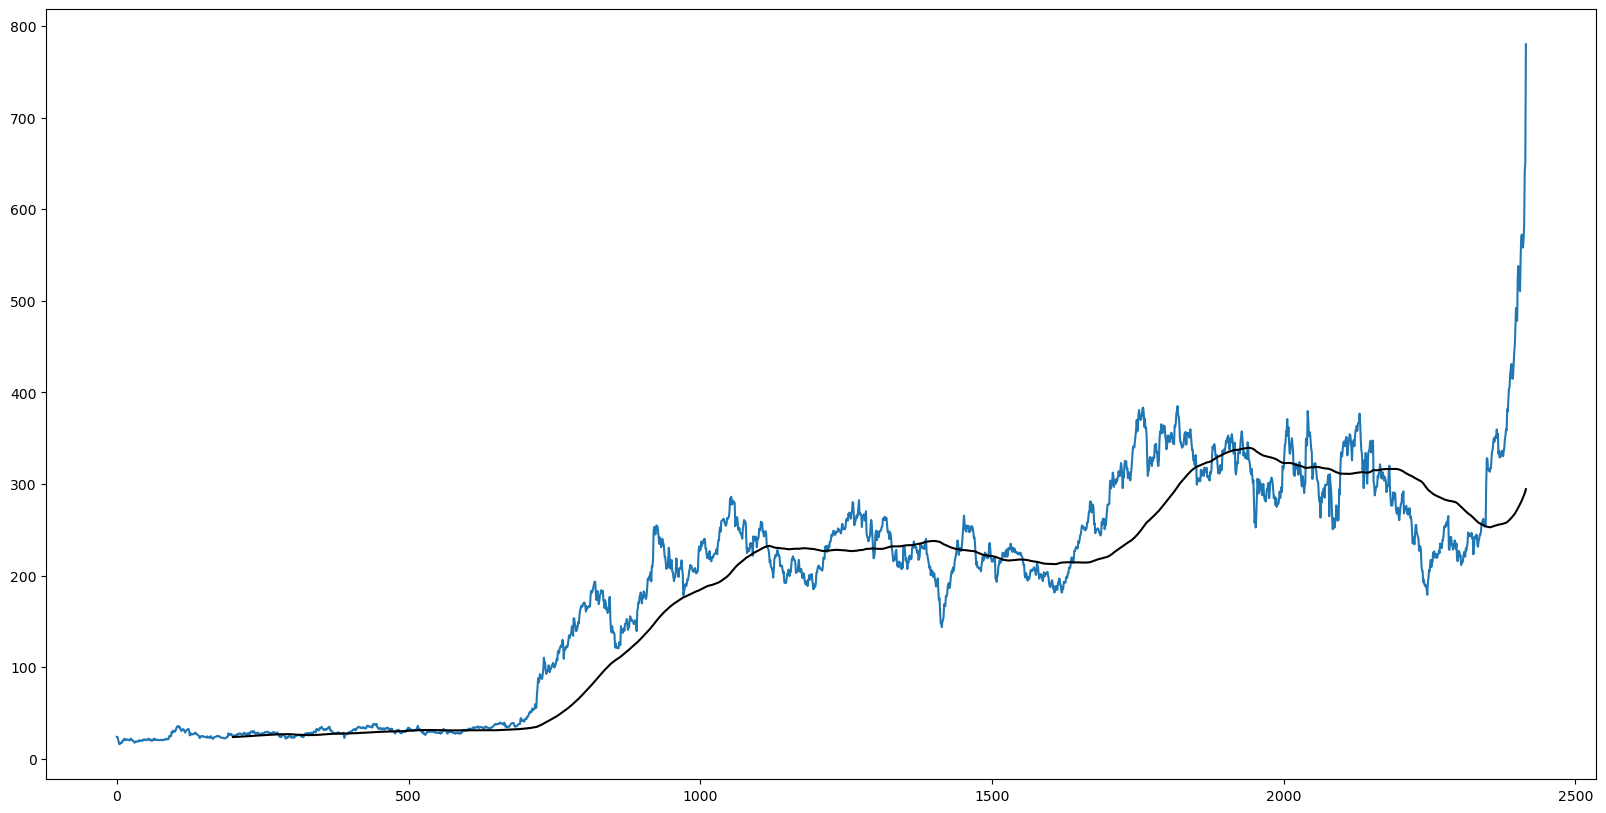

In [82]:
plt.figure(figsize= (20, 10))
plt.plot(df.Close)
plt.plot(ma200, 'black')

# Pre-Processing

In [63]:
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300


In [65]:
df = df.drop(['Date'], axis =1 )

# Train Test Split

In [90]:
# 70% data in training starting from 0 to length of df * 70%
# 30% data remaning in dataframe in testing strating from 70% to len(df)
train_data = pd.DataFrame(df['Close'] [0: int(len(df) * 0.7)])
test_data = pd.DataFrame(df['Close'] [int(len(df) * 0.7) : int(len(df))])


print(train_data.shape)
print(test_data.shape)

(1691, 1)
(725, 1)


In [ ]:
# Scale down the data

In [97]:
# scaler = StandardScaler(feature_range = (0,1))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

feature_min = 0
feature_max = 1

# Scale the data to the desired range
scaled_data = (scaled_data - scaled_data.min()) / (scaled_data.max() - scaled_data.min())
scaled_data = scaled_data * (feature_max - feature_min) + feature_min

In [99]:
scaled_data
# So scaled_data is stored in the scaled_data varibale which is 
# According to the limited range
scaled_data.shape

(2416, 5)

In [103]:
x_train = []
y_train = []

for i in range(100, scaled_data.shape[0]):
    x_train.append(scaled_data[i - 100: i])
    y_train.append(scaled_data[i, 0])

# For providing the x_train and y_train in the LSTM Model
x_train, y_train = np.asarray(x_train), np.asarray(y_train)

In [108]:
print(x_train, "\n", y_train)
x_train.shape

[[[0.00290998 0.00776387 0.00224553 0.00748304 0.41844359]
  [0.00877146 0.0123594  0.00729796 0.00743142 0.38599002]
  [0.00808949 0.00854392 0.00464017 0.0058225  0.20168572]
  ...
  [0.01259566 0.01449607 0.0133679  0.01342829 0.08668639]
  [0.013269   0.01319033 0.01178902 0.01245606 0.06047816]
  [0.0125784  0.0126392  0.01195568 0.01230119 0.04819709]]

 [[0.00877146 0.0123594  0.00729796 0.00743142 0.38599002]
  [0.00808949 0.00854392 0.00464017 0.0058225  0.20168572]
  [0.00636298 0.00615289 0.0032718  0.00344784 0.13841029]
  ...
  [0.013269   0.01319033 0.01178902 0.01245606 0.06047816]
  [0.0125784  0.0126392  0.01195568 0.01230119 0.04819709]
  [0.01298413 0.01263072 0.01222759 0.01264534 0.05243258]]

 [[0.00808949 0.00854392 0.00464017 0.0058225  0.20168572]
  [0.00636298 0.00615289 0.0032718  0.00344784 0.13841029]
  [0.00377323 0.00352445 0.00074559 0.00078926 0.1739033 ]
  ...
  [0.0125784  0.0126392  0.01195568 0.01230119 0.04819709]
  [0.01298413 0.01263072 0.0122275

(2316, 100, 5)

# Processing

In [109]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [115]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))
          

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
          
model.add(Dense(units = 1))

In [131]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [130]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


ValueError: in user code:

    File "C:\Users\KIIT\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\KIIT\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\KIIT\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\KIIT\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\KIIT\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\KIIT\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected shape=(None, None, 1), found shape=(None, 100, 5)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 100, 5), dtype=float32)
      • training=True
      • mask=None


In [132]:
model.save('keras_model.h5')

In [135]:
test_data.head()

,Close
1691,261.500000
1692,261.920013
1693,250.679993
1694,255.009995
1695,254.779999


In [137]:
train_data.tail()

,Close
1686,243.690002
1687,246.169998
1688,258.000000
1689,255.729996
1690,262.049988


In [138]:
past_100_days = train_data.tail(100)

In [140]:
final_df=past_100_days.append(test_data, ignore_index = True)

In [141]:
input_data = scaler.fit_transform(final_df)

input_data

array([[-1.54549126e+00],
       [-1.50489995e+00],
       [-1.51128509e+00],
       [-1.51280523e+00],
       [-1.48589652e+00],
       [-1.54731551e+00],
       [-1.58136973e+00],
       [-1.68687680e+00],
       [-1.72898823e+00],
       [-1.73810996e+00],
       [-1.69037336e+00],
       [-1.65008595e+00],
       [-1.62378529e+00],
       [-1.69797473e+00],
       [-1.76957952e+00],
       [-1.72077884e+00],
       [-1.82887035e+00],
       [-1.79359988e+00],
       [-1.79116761e+00],
       [-1.71925847e+00],
       [-1.77459645e+00],
       [-1.78219782e+00],
       [-1.68109968e+00],
       [-1.65115027e+00],
       [-1.59778872e+00],
       [-1.60584616e+00],
       [-1.70542393e+00],
       [-1.70800860e+00],
       [-1.82233305e+00],
       [-1.82856623e+00],
       [-1.74753559e+00],
       [-1.76197815e+00],
       [-1.65099832e+00],
       [-1.66407269e+00],
       [-1.66574499e+00],
       [-1.66194430e+00],
       [-1.57498461e+00],
       [-1.56677500e+00],
       [-1.5

In [142]:
input_data.shape

(825, 1)

In [144]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [146]:
x_test, y_test = np.asarray(x_test), np.asarray(y_test)
print(x_test.shape,"\n", y_test.shape)

(725, 100, 1) 
 (725,)


In [148]:
y_predict = model.predict(x_test)
y_predict.shape

23/23 [==============================] - 3s 111ms/step


(725, 1)

In [149]:
scaler.scale_

array([65.77760881])

In [151]:
scale_factor = 1/ 65.77760881
y_predict = y_predict * scale_factor
y_test = y_test * scale_factor

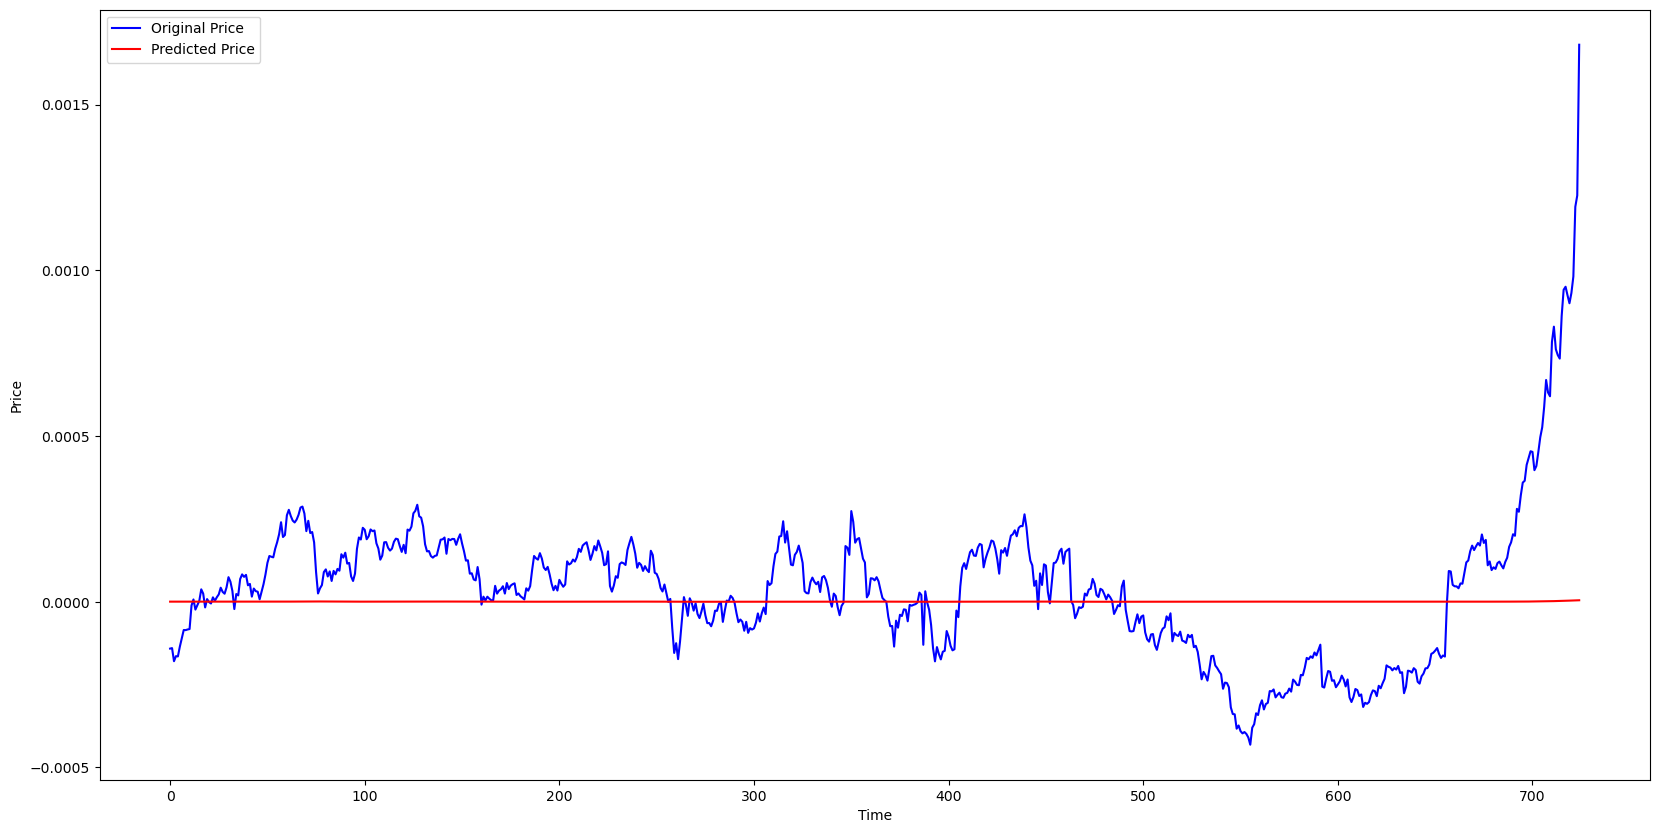

In [153]:
plt.figure(figsize = (20,10))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()